In [ ]:
import warnings
warnings.filterwarnings('ignore')

import math
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Dense, GRU, Conv1D, MaxPooling1D, Flatten,BatchNormalization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dropout, Dense

from sklearn import preprocessing, metrics
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# PREPROCESSING

In [ ]:
# re-reading the stock_data into pandas dataframe
stock_data = pd.read_csv('/content/drive/MyDrive/JU PROJ/TSLA FinBERT/TOTAL_FINBERT_Tesla_stock_data.csv', index_col = False)

# renaming the column
stock_data.rename(columns={'Unnamed: 0':'Date'}, inplace = True)

# setting the column 'Date' as the index column
stock_data.set_index('Date', inplace=True)

# displaying the stock_data
stock_data

,Close,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,
2017-01-03,43.397999,0.150608,0.209587,0.639805,42.972000,44.066002,42.192001,29616500.0
2017-01-04,45.397999,0.173676,0.187838,0.638485,42.950001,45.599998,42.862000,56067500.0
2017-01-05,45.349998,0.115238,0.162271,0.722491,45.284000,45.495998,44.389999,29558500.0
2017-01-06,45.801998,0.143946,0.211864,0.644191,45.386002,46.062000,45.090000,27639500.0
2017-01-09,46.256001,0.092892,0.182005,0.725102,45.793999,46.383999,45.599998,19897500.0
...,...,...,...,...,...,...,...,...
2022-05-02,902.940002,0.106230,0.211320,0.682450,860.770020,906.359985,848.030029,25260500.0
2022-05-03,909.250000,0.106230,0.211320,0.682450,903.179993,924.080017,888.590027,21236500.0
2022-05-04,952.619995,0.106230,0.211320,0.682450,903.940002,955.500000,885.280029,27214600.0


In [ ]:
stock_data.shape

(1346, 8)

In [ ]:
stock_data.isna().any()

Close       False
negative    False
neutral     False
positive    False
Open        False
High        False
Low         False
Volume      False
dtype: bool

In [ ]:
stock_data = stock_data.dropna()

In [ ]:
stock_data.isna().any()

Close       False
negative    False
neutral     False
positive    False
Open        False
High        False
Low         False
Volume      False
dtype: bool

In [ ]:
stock_data

,Close,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,
2017-01-03,43.397999,0.150608,0.209587,0.639805,42.972000,44.066002,42.192001,29616500.0
2017-01-04,45.397999,0.173676,0.187838,0.638485,42.950001,45.599998,42.862000,56067500.0
2017-01-05,45.349998,0.115238,0.162271,0.722491,45.284000,45.495998,44.389999,29558500.0
2017-01-06,45.801998,0.143946,0.211864,0.644191,45.386002,46.062000,45.090000,27639500.0
2017-01-09,46.256001,0.092892,0.182005,0.725102,45.793999,46.383999,45.599998,19897500.0
...,...,...,...,...,...,...,...,...
2022-05-02,902.940002,0.106230,0.211320,0.682450,860.770020,906.359985,848.030029,25260500.0
2022-05-03,909.250000,0.106230,0.211320,0.682450,903.179993,924.080017,888.590027,21236500.0
2022-05-04,952.619995,0.106230,0.211320,0.682450,903.940002,955.500000,885.280029,27214600.0


In [ ]:
stock_data.describe(include='all')

,Close,negative,neutral,positive,Open,High,Low,Volume
count,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1.346000e+03
mean,295.546675,0.135288,0.173204,0.691508,295.573306,302.247606,288.313605,4.351325e+07
std,336.618073,0.101520,0.118294,0.136007,336.945344,344.687318,328.204762,2.958215e+07
min,35.793999,0.011124,0.009788,0.039601,36.220001,37.335999,35.397999,9.800600e+06
25%,60.522501,0.071582,0.086735,0.620725,60.400002,61.504500,59.273000,2.458988e+07
50%,70.862000,0.107078,0.163549,0.709822,70.875000,71.915001,69.917000,3.421775e+07
75%,606.112503,0.165091,0.227628,0.777604,604.659988,621.204971,595.574982,5.067100e+07
max,1229.910034,0.916332,0.949275,0.947868,1234.410034,1243.489990,1217.000000,3.046940e+08


In [ ]:
stock_data= stock_data.astype({"Volume":'float'})

In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 2017-01-03 to 2022-05-06
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     1346 non-null   float64
 1   negative  1346 non-null   float64
 2   neutral   1346 non-null   float64
 3   positive  1346 non-null   float64
 4   Open      1346 non-null   float64
 5   High      1346 non-null   float64
 6   Low       1346 non-null   float64
 7   Volume    1346 non-null   float64
dtypes: float64(8)
memory usage: 94.6+ KB


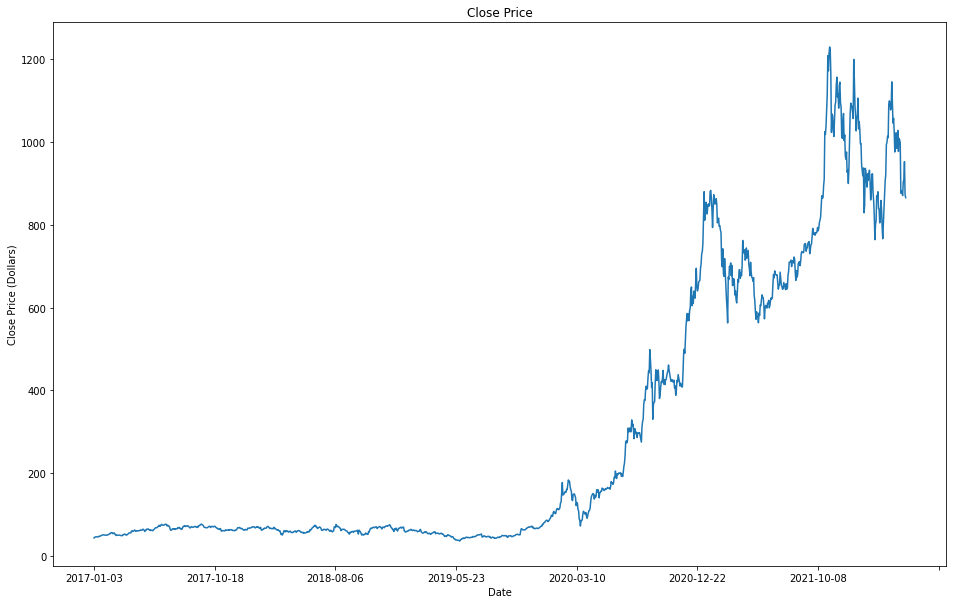

In [ ]:
# setting figure size
plt.figure(figsize=(16,10))

# plotting close price
stock_data['Close'].plot()

# setting plot title, x and y labels
plt.title("Close Price")
plt.xlabel('Date')
plt.ylabel('Close Price (Dollars)')
plt.show()

In [ ]:
stock_data.rolling(7).mean()

,Close,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-05-02,916.030003,0.125973,0.206626,0.667401,935.841422,957.461426,894.484288,3.047576e+07
2022-05-03,902.344291,0.108403,0.215238,0.676358,919.879996,941.637146,879.425720,3.019066e+07
2022-05-04,895.858573,0.107661,0.214271,0.678069,909.161429,934.048575,866.565726,3.082411e+07


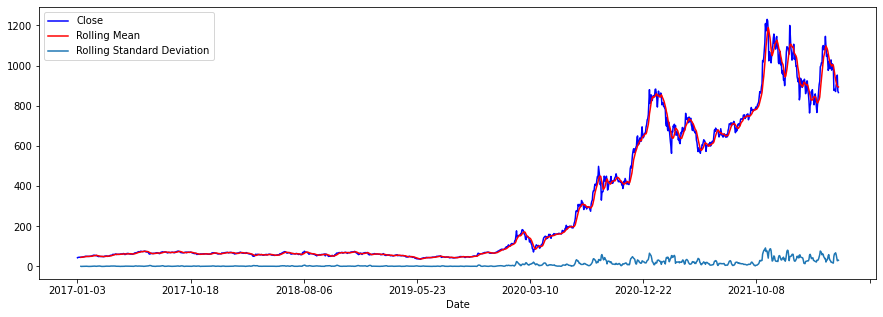

In [ ]:
# plotting the close price and a 7-day rolling mean of close price
close = stock_data['Close']
ma = close.rolling(window = 7).mean()
std = close.rolling(window = 7).std()

plt.figure(figsize=(15, 5))
stock_data['Close'].plot(color = 'b', label = 'Close')
ma.plot(color = 'red', label = 'Rolling Mean')
std.plot(label = 'Rolling Standard Deviation')
plt.legend()
plt.show()

In [ ]:
stock_data.rolling(30).mean()

,Close,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-05-02,1005.083327,0.107153,0.159222,0.733625,1009.516665,1033.530656,982.839667,2.579110e+07
2022-05-03,1004.686328,0.109126,0.156093,0.734781,1009.123332,1032.904991,982.223000,2.558807e+07
2022-05-04,1003.307662,0.109894,0.157079,0.733027,1008.254665,1031.492991,981.007334,2.531891e+07


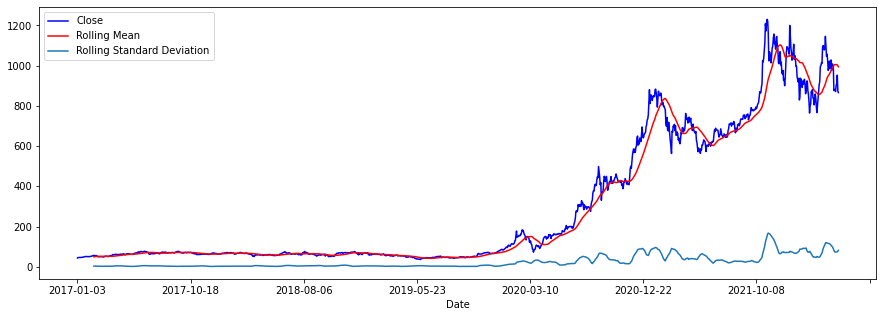

In [ ]:
# plotting the close price and a 30-day rolling mean of close price
close = stock_data['Close']
ma = close.rolling(window = 30).mean()
std = close.rolling(window = 30).std()

plt.figure(figsize=(15, 5))
stock_data['Close'].plot(color = 'b', label = 'Close')
ma.plot(color = 'red', label = 'Rolling Mean')
std.plot(label = 'Rolling Standard Deviation')
plt.legend()
plt.show()

In [ ]:
stock_data.rolling(90).mean()

,Close,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-05-02,958.390995,0.121076,0.171462,0.707463,960.808110,986.118996,933.088334,2.627738e+07
2022-05-03,957.284106,0.121360,0.170265,0.708375,960.113888,985.101441,932.327668,2.616655e+07
2022-05-04,956.013217,0.121645,0.169067,0.709288,958.970999,983.796108,931.080113,2.612555e+07


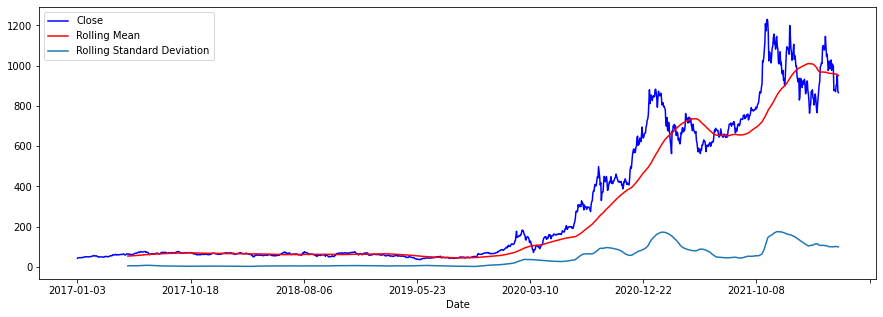

In [ ]:
# plotting the close price and a 90-day rolling mean of close price
close = stock_data['Close']
ma = close.rolling(window = 90).mean()
std = close.rolling(window = 90).std()

plt.figure(figsize=(15, 5))
stock_data['Close'].plot(color = 'b', label = 'Close')
ma.plot(color = 'red', label = 'Rolling Mean')
std.plot(label = 'Rolling Standard Deviation')
plt.legend()
plt.show()

In [ ]:
# calculating data_to_use
percentage_of_data = 1.0
data_to_use = int(percentage_of_data*(len(stock_data)-1))

# using 80% of data for training
train_end = int(data_to_use*0.8)
total_data = len(stock_data)
start = total_data - data_to_use

# printing number of records in the training and test datasets
print("Number of records in Training Data:", train_end)
print("Number of records in Test Data:", total_data - train_end)

Number of records in Training Data: 1076
Number of records in Test Data: 270


In [ ]:
stock_data['Close_EWMA3'] = stock_data['Close'].ewm(span=3, adjust=False).mean()
stock_data['Close_EWMA7'] = stock_data['Close'].ewm(span=7, adjust=False).mean()
stock_data['Close_EWMA14'] = stock_data['Close'].ewm(span=14, adjust=False).mean()
stock_data['Close_EWMA30'] = stock_data['Close'].ewm(span=30, adjust=False).mean()

stock_data['pos_EWMA3'] = stock_data['positive'].ewm(span=3, adjust=False).mean()
stock_data['pos_EWMA7'] = stock_data['positive'].ewm(span=7, adjust=False).mean()
stock_data['pos_EWMA14'] = stock_data['positive'].ewm(span=14, adjust=False).mean()
stock_data['pos_EWMA30'] = stock_data['positive'].ewm(span=30, adjust=False).mean()

stock_data['neu_EWMA3'] = stock_data['neutral'].ewm(span=3, adjust=False).mean()
stock_data['neu_EWMA7'] = stock_data['neutral'].ewm(span=7, adjust=False).mean()
stock_data['neu_EWMA14'] = stock_data['neutral'].ewm(span=14, adjust=False).mean()
stock_data['neu_EWMA30'] = stock_data['neutral'].ewm(span=30, adjust=False).mean()

stock_data['neg_EWMA3'] = stock_data['negative'].ewm(span=3, adjust=False).mean()
stock_data['neg_EWMA7'] = stock_data['negative'].ewm(span=7, adjust=False).mean()
stock_data['neg_EWMA14'] = stock_data['negative'].ewm(span=14, adjust=False).mean()
stock_data['neg_EWMA30'] = stock_data['negative'].ewm(span=30, adjust=False).mean()


# predicting one step ahead
steps_to_predict = 1

# capturing data to be used for each column
close_price = stock_data.iloc[start:total_data,0] #close

negative = stock_data.iloc[start:total_data,1] #neg
neutral = stock_data.iloc[start:total_data,2] #neu
positive = stock_data.iloc[start:total_data,3] #pos
open_price = stock_data.iloc[start:total_data,4] #open
high = stock_data.iloc[start:total_data,5] #high
low = stock_data.iloc[start:total_data,6] #low
volume = stock_data.iloc[start:total_data,7] #volume

ewma3_close = stock_data.iloc[start:total_data,8]#exponentially moving average 3days
ewma7_close = stock_data.iloc[start:total_data,9]#exponentially moving average 7days
ewma14_close = stock_data.iloc[start:total_data,10]#exponentially moving average 14days
ewma30_close = stock_data.iloc[start:total_data,11]#exponentially moving average 30days

ewma3_pos = stock_data.iloc[start:total_data,12]#exponentially moving average 3days
ewma7_pos = stock_data.iloc[start:total_data,13]#exponentially moving average 7days
ewma14_pos = stock_data.iloc[start:total_data,14]#exponentially moving average 14days
ewma30_pos = stock_data.iloc[start:total_data,15]#exponentially moving average 30days

ewma3_neu = stock_data.iloc[start:total_data,16]#exponentially moving average 3days
ewma7_neu = stock_data.iloc[start:total_data,17]#exponentially moving average 7days
ewma14_neu = stock_data.iloc[start:total_data,18]#exponentially moving average 14days
ewma30_neu = stock_data.iloc[start:total_data,19]#exponentially moving average 30days

ewma3_neg = stock_data.iloc[start:total_data,20]#exponentially moving average 3days
ewma7_neg = stock_data.iloc[start:total_data,21]#exponentially moving average 7days
ewma14_neg = stock_data.iloc[start:total_data,22]#exponentially moving average 14days
ewma30_neg = stock_data.iloc[start:total_data,23]#exponentially moving average 30days

In [ ]:
# printing close price
print("Close Price:")
close_price

Close Price:


Date
2017-01-04     45.397999
2017-01-05     45.349998
2017-01-06     45.801998
2017-01-09     46.256001
2017-01-10     45.973999
                 ...    
2022-05-02    902.940002
2022-05-03    909.250000
2022-05-04    952.619995
2022-05-05    873.280029
2022-05-06    865.650024
Name: Close, Length: 1345, dtype: float64

In [ ]:
# shifting next day close
close_price_shifted = close_price.shift(-1) 

# concatenating the captured training data into a dataframe
data = pd.concat([close_price,
                  ewma3_close,
                  ewma7_close,
                  ewma14_close,
                  ewma30_close, 
                  close_price_shifted, 

                  positive,
                  ewma3_pos,
                  ewma7_pos,
                  ewma14_pos,
                  ewma30_pos, 

                  negative,
                  ewma3_neg,
                  ewma7_neg,
                  ewma14_neg,
                  ewma30_neg,

                  neutral,
                  ewma3_neu,
                  ewma7_neu,
                  ewma14_neu,
                  ewma30_neu, 

                  volume, 
                  open_price, 
                  high, 
                  low], 
                 axis=1)
data.columns = ['close_price', 
                'ewma3_close',
                'ewma7_close',
                'ewma14_close',
                'ewma30_close',
                'close_price_shifted', 
                
                'positive', 
                'ewma3_pos',
                'ewma7_pos',
                'ewma14_pos',
                'ewma30_pos',
                
                'negative',
                'ewma3_neg',
                'ewma7_neg',
                'ewma14_neg',
                'ewma30_neg',

                'neutral', 
                'ewma3_neu',
                'ewma7_neu',
                'ewma14_neu',
                'ewma30_neu',

                'volume', 
                'open_price', 
                'high', 
                'low']
data

,close_price,ewma3_close,ewma7_close,ewma14_close,ewma30_close,close_price_shifted,positive,ewma3_pos,ewma7_pos,ewma14_pos,...,ewma30_neg,neutral,ewma3_neu,ewma7_neu,ewma14_neu,ewma30_neu,volume,open_price,high,low
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-04,45.397999,44.397999,43.897999,43.664665,43.527031,45.349998,0.638485,0.639145,0.639475,0.639629,...,0.152096,0.187838,0.198713,0.204150,0.206687,0.208184,56067500.0,42.950001,45.599998,42.862000
2017-01-05,45.349998,44.873999,44.260999,43.889377,43.644642,45.801998,0.722491,0.680818,0.660229,0.650678,...,0.149718,0.162271,0.180492,0.193680,0.200765,0.205222,29558500.0,45.284000,45.495998,44.389999
2017-01-06,45.801998,45.337998,44.646249,44.144393,43.783826,46.256001,0.644191,0.662505,0.656220,0.649813,...,0.149346,0.211864,0.196178,0.198226,0.202245,0.205650,27639500.0,45.386002,46.062000,45.090000
2017-01-09,46.256001,45.796999,45.048687,44.425940,43.943321,45.973999,0.725102,0.693803,0.673440,0.659851,...,0.145704,0.182005,0.189092,0.194171,0.199546,0.204125,19897500.0,45.793999,46.383999,45.599998
2017-01-10,45.973999,45.885499,45.280015,44.632348,44.074333,45.945999,0.725102,0.709453,0.686356,0.668551,...,0.142296,0.182005,0.185548,0.191129,0.197207,0.202698,18300000.0,46.400002,46.400002,45.377998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-02,902.940002,892.608051,913.037741,944.743648,961.509550,909.250000,0.682450,0.678314,0.682759,0.701668,...,0.119038,0.211320,0.212969,0.196035,0.172759,0.164380,25260500.0,860.770020,906.359985,848.030029
2022-05-03,909.250000,900.929025,912.090806,940.011162,958.137966,952.619995,0.682450,0.680382,0.682682,0.699105,...,0.118212,0.211320,0.212145,0.199856,0.177901,0.167409,21236500.0,903.179993,924.080017,888.590027
2022-05-04,952.619995,926.774510,922.223103,941.692339,957.781968,873.280029,0.682450,0.681416,0.682624,0.696884,...,0.117439,0.211320,0.211732,0.202722,0.182357,0.170242,27214600.0,903.940002,955.500000,885.280029


In [ ]:
data = data.dropna()

In [ ]:
# setting the target variable as the shifted close_price
y = data['close_price_shifted']
y

Date
2017-01-04     45.349998
2017-01-05     45.801998
2017-01-06     46.256001
2017-01-09     45.973999
2017-01-10     45.945999
                 ...    
2022-04-29    902.940002
2022-05-02    909.250000
2022-05-03    952.619995
2022-05-04    873.280029
2022-05-05    865.650024
Name: close_price_shifted, Length: 1344, dtype: float64

In [ ]:
# setting the features dataset for prediction  
cols = ['close_price', 
                'ewma3_close',
                'ewma7_close',
                'ewma14_close',
                'ewma30_close',
                'close_price_shifted', 
                
                'positive', 
                'ewma3_pos',
                'ewma7_pos',
                'ewma14_pos',
                'ewma30_pos',
                
                'negative',
                'ewma3_neg',
                'ewma7_neg',
                'ewma14_neg',
                'ewma30_neg',

                'neutral', 
                'ewma3_neu',
                'ewma7_neu',
                'ewma14_neu',
                'ewma30_neu',

                'volume', 
                'open_price', 
                'high', 
                'low']
x = data[cols]
x

,close_price,ewma3_close,ewma7_close,ewma14_close,ewma30_close,close_price_shifted,positive,ewma3_pos,ewma7_pos,ewma14_pos,...,ewma30_neg,neutral,ewma3_neu,ewma7_neu,ewma14_neu,ewma30_neu,volume,open_price,high,low
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-04,45.397999,44.397999,43.897999,43.664665,43.527031,45.349998,0.638485,0.639145,0.639475,0.639629,...,0.152096,0.187838,0.198713,0.204150,0.206687,0.208184,56067500.0,42.950001,45.599998,42.862000
2017-01-05,45.349998,44.873999,44.260999,43.889377,43.644642,45.801998,0.722491,0.680818,0.660229,0.650678,...,0.149718,0.162271,0.180492,0.193680,0.200765,0.205222,29558500.0,45.284000,45.495998,44.389999
2017-01-06,45.801998,45.337998,44.646249,44.144393,43.783826,46.256001,0.644191,0.662505,0.656220,0.649813,...,0.149346,0.211864,0.196178,0.198226,0.202245,0.205650,27639500.0,45.386002,46.062000,45.090000
2017-01-09,46.256001,45.796999,45.048687,44.425940,43.943321,45.973999,0.725102,0.693803,0.673440,0.659851,...,0.145704,0.182005,0.189092,0.194171,0.199546,0.204125,19897500.0,45.793999,46.383999,45.599998
2017-01-10,45.973999,45.885499,45.280015,44.632348,44.074333,45.945999,0.725102,0.709453,0.686356,0.668551,...,0.142296,0.182005,0.185548,0.191129,0.197207,0.202698,18300000.0,46.400002,46.400002,45.377998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-29,870.760010,882.276100,916.403654,951.174978,965.548829,902.940002,0.675729,0.674178,0.682862,0.704624,...,0.119921,0.218424,0.214617,0.190940,0.166827,0.161143,29377700.0,902.250000,934.400024,870.000000
2022-05-02,902.940002,892.608051,913.037741,944.743648,961.509550,909.250000,0.682450,0.678314,0.682759,0.701668,...,0.119038,0.211320,0.212969,0.196035,0.172759,0.164380,25260500.0,860.770020,906.359985,848.030029
2022-05-03,909.250000,900.929025,912.090806,940.011162,958.137966,952.619995,0.682450,0.680382,0.682682,0.699105,...,0.118212,0.211320,0.212145,0.199856,0.177901,0.167409,21236500.0,903.179993,924.080017,888.590027


In [ ]:
from sklearn.preprocessing import StandardScaler
# scaling the feature dataset

scaler_x = preprocessing.StandardScaler ()
x = np.array(x).reshape((len(x) ,len(cols)))

# scaling the target variable
scaler_y = preprocessing.StandardScaler ()
y = np.array (y).reshape ((len( y), 1))

# displaying the scaled feature dataset and the target variable
x, y

(array([[ 45.39799881,  44.39799881,  43.89799881, ...,  42.95000076,
          45.59999847,  42.86199951],
        [ 45.34999847,  44.87399864,  44.26099873, ...,  45.2840004 ,
          45.49599838,  44.38999939],
        [ 45.80199814,  45.33799839,  44.64624858, ...,  45.38600159,
          46.06200027,  45.09000015],
        ...,
        [909.25      , 900.92902549, 912.09080573, ..., 903.17999268,
         924.08001709, 888.59002686],
        [952.61999512, 926.7745103 , 922.22310307, ..., 903.94000244,
         955.5       , 885.2800293 ],
        [873.2800293 , 900.0272698 , 909.98733463, ..., 939.02001953,
         945.59997559, 857.70001221]]), array([[ 45.34999847],
        [ 45.80199814],
        [ 46.25600052],
        ...,
        [952.61999512],
        [873.2800293 ],
        [865.65002441]]))

In [ ]:
# preparing training and test dataset
X_train = x[0 : train_end,]
X_test = x[train_end+1 : len(x),]    
y_train = y[0 : train_end] 
y_test = y[train_end+1 : len(y)]  

# printing the shape of the training and the test datasets
print('Number of rows and columns in the Training set X:', X_train.shape, 'and y:', y_train.shape)
print('Number of rows and columns in the Test set X:', X_test.shape, 'and y:', y_test.shape)

Number of rows and columns in the Training set X: (1076, 25) and y: (1076, 1)
Number of rows and columns in the Test set X: (267, 25) and y: (267, 1)


In [ ]:
sc = scaler_x.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

sc = scaler_y.fit(y_train)
y_train = sc.transform(y_train)
y_test = sc.transform(y_test)

In [ ]:
# reshaping the feature dataset for feeding into the model
X_train = X_train.reshape (X_train.shape + (1,)) 
X_test = X_test.reshape(X_test.shape + (1,))

# printing the re-shaped feature dataset
print('Shape of Training set X:', X_train.shape)
print('Shape of Test set X:', X_test.shape)

Shape of Training set X: (1076, 25, 1)
Shape of Test set X: (267, 25, 1)


# MODELS

### MLP

In [ ]:
import tensorflow as tf
import random 
import os

seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

initializer = tf.keras.initializers.GlorotNormal()
model0 = Sequential()
model0.add(Dense(64, activation = 'tanh', input_shape=(len(cols),1),kernel_initializer=initializer))
model0.add(Dropout(0.3))
model0.add(Dense(32, activation = 'tanh'))
model0.add(Dropout(0.3))
model0.add(Dense(16, activation = 'tanh'))
model0.add(Dropout(0.3))
model0.add(Flatten())
model0.add(Dense(1, activation = 'linear'))

model0.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 25, 64)            128       
                                                                 
 dropout_35 (Dropout)        (None, 25, 64)            0         
                                                                 
 dense_15 (Dense)            (None, 25, 32)            2080      
                                                                 
 dropout_36 (Dropout)        (None, 25, 32)            0         
                                                                 
 dense_16 (Dense)            (None, 25, 16)            528       
                                                                 
 dropout_37 (Dropout)        (None, 25, 16)            0         
                                                                 
 flatten_11 (Flatten)        (None, 400)             

In [ ]:
import tensorflow as tf
model0.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4)
)

callbacks = [tf.keras.callbacks.EarlyStopping(patience=10, \
    restore_best_weights=True)]

history = model0.fit(
    X_train,
    y_train,
    validation_split=0.1,
    epochs=250,
    batch_size=12,
    callbacks=callbacks,
    shuffle = False
)

Epoch 1/250
81/81 [==============================] - 1s 5ms/step - loss: 0.6265 - val_loss: 10.0715
Epoch 2/250
81/81 [==============================] - 0s 4ms/step - loss: 0.4051 - val_loss: 8.3606
Epoch 3/250
81/81 [==============================] - 0s 4ms/step - loss: 0.3066 - val_loss: 6.9915
Epoch 4/250
81/81 [==============================] - 0s 4ms/step - loss: 0.2287 - val_loss: 5.7738
Epoch 5/250
81/81 [==============================] - 0s 4ms/step - loss: 0.2000 - val_loss: 4.6897
Epoch 6/250
81/81 [==============================] - 0s 4ms/step - loss: 0.1662 - val_loss: 3.7461
Epoch 7/250
81/81 [==============================] - 0s 4ms/step - loss: 0.1531 - val_loss: 2.9903
Epoch 8/250
81/81 [==============================] - 0s 4ms/step - loss: 0.1252 - val_loss: 2.4236
Epoch 9/250
81/81 [==============================] - 0s 4ms/step - loss: 0.1122 - val_loss: 1.9801
Epoch 10/250
81/81 [==============================] - 0s 4ms/step - loss: 0.1058 - val_loss: 1.5958
Epoch 11

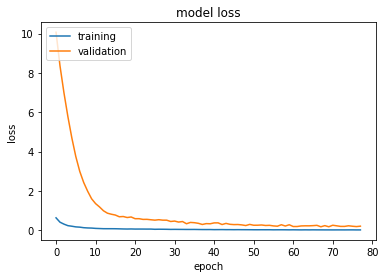

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [ ]:
# performing predictions
predictionsMLP = model0.predict(X_test) 

# unscaling the predictions
predictionsMLP = scaler_y.inverse_transform(np.array(predictionsMLP).reshape((len(predictionsMLP), 1)))

# printing the predictions
print('Predictions:')
predictionsMLP

Predictions:


array([[657.82745],
       [652.91406],
       [656.4159 ],
       [656.4004 ],
       [659.2816 ],
       [659.6558 ],
       [662.5716 ],
       [653.56433],
       [647.16986],
       [644.2119 ],
       [643.66846],
       [642.9467 ],
       [637.31024],
       [635.9005 ],
       [632.3397 ],
       [629.3268 ],
       [618.923  ],
       [604.33887],
       [595.9971 ],
       [589.7161 ],
       [586.8209 ],
       [582.1173 ],
       [579.58954],
       [573.17365],
       [579.1515 ],
       [582.55707],
       [585.2513 ],
       [589.7878 ],
       [593.88947],
       [597.6498 ],
       [598.82654],
       [597.57086],
       [590.59326],
       [582.8621 ],
       [583.3094 ],
       [585.8757 ],
       [589.43896],
       [587.0106 ],
       [589.1324 ],
       [590.10803],
       [592.0207 ],
       [589.62976],
       [588.3366 ],
       [592.42755],
       [595.41986],
       [596.4232 ],
       [599.3771 ],
       [610.0429 ],
       [621.73694],
       [623.329  ],


### CNN

In [ ]:
# Defining model Architecture

seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

model1 = Sequential()
model1.add(Conv1D(filters=64, kernel_size=2, activation='tanh', input_shape=(len(cols),1),kernel_initializer=initializer))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Dropout(0.3))
model1.add(Flatten())
model1.add(Dense(32, activation='tanh'))
model1.add(Dropout(0.3))
model1.add(Dense(1, activation='linear'))

model1.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 24, 64)            192       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 12, 64)           0         
 1D)                                                             
                                                                 
 dropout_38 (Dropout)        (None, 12, 64)            0         
                                                                 
 flatten_12 (Flatten)        (None, 768)               0         
                                                                 
 dense_18 (Dense)            (None, 32)                24608     
                                                                 
 dropout_39 (Dropout)        (None, 32)                0         
                                                     

In [ ]:
import tensorflow as tf
model1.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4)
)

callbacks = [tf.keras.callbacks.EarlyStopping(patience=10, \
    restore_best_weights=True)]

history = model1.fit(
    X_train,
    y_train,
    validation_split=0.1,
    epochs=250,
    batch_size=12,
    callbacks=callbacks,
    shuffle = False
)

Epoch 1/250
81/81 [==============================] - 1s 4ms/step - loss: 0.2113 - val_loss: 1.9212
Epoch 2/250
81/81 [==============================] - 0s 3ms/step - loss: 0.0958 - val_loss: 0.3244
Epoch 3/250
81/81 [==============================] - 0s 3ms/step - loss: 0.0744 - val_loss: 0.3045
Epoch 4/250
81/81 [==============================] - 0s 3ms/step - loss: 0.0747 - val_loss: 0.2165
Epoch 5/250
81/81 [==============================] - 0s 3ms/step - loss: 0.0700 - val_loss: 0.1867
Epoch 6/250
81/81 [==============================] - 0s 3ms/step - loss: 0.0631 - val_loss: 0.2055
Epoch 7/250
81/81 [==============================] - 0s 3ms/step - loss: 0.0537 - val_loss: 0.2172
Epoch 8/250
81/81 [==============================] - 0s 3ms/step - loss: 0.0493 - val_loss: 0.2484
Epoch 9/250
81/81 [==============================] - 0s 3ms/step - loss: 0.0527 - val_loss: 0.2116
Epoch 10/250
81/81 [==============================] - 0s 3ms/step - loss: 0.0488 - val_loss: 0.2813
Epoch 11/

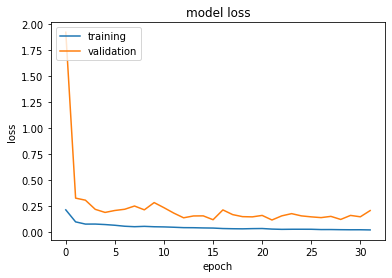

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [ ]:
# performing predictions
predictionsCNN = model1.predict(X_test) 

# unscaling the predictions
predictionsCNN = scaler_y.inverse_transform(np.array(predictionsCNN).reshape((len(predictionsCNN), 1)))

# printing the predictions
print('Predictions:')
predictionsCNN

Predictions:


array([[676.5126 ],
       [665.4408 ],
       [674.77466],
       [674.0226 ],
       [678.0455 ],
       [664.7666 ],
       [675.8761 ],
       [665.927  ],
       [657.3171 ],
       [659.7457 ],
       [661.5282 ],
       [655.9882 ],
       [645.193  ],
       [643.3234 ],
       [643.59717],
       [640.89484],
       [632.5629 ],
       [618.10284],
       [610.33527],
       [600.1059 ],
       [596.3314 ],
       [591.122  ],
       [588.7856 ],
       [582.2492 ],
       [588.70557],
       [589.3231 ],
       [596.0222 ],
       [598.7263 ],
       [606.19586],
       [609.6008 ],
       [610.4283 ],
       [603.6331 ],
       [595.9977 ],
       [589.85046],
       [589.1051 ],
       [591.33813],
       [595.0301 ],
       [590.86804],
       [593.64624],
       [592.67145],
       [590.35754],
       [588.3333 ],
       [583.63574],
       [586.57166],
       [591.07196],
       [588.1567 ],
       [588.29425],
       [601.8519 ],
       [622.6721 ],
       [623.32916],


### RNN

In [ ]:
from keras.layers import SimpleRNN

seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# setting the model architecture
model2=Sequential()
model2.add(SimpleRNN(250,return_sequences=True,activation='tanh',input_shape=(len(cols),1),kernel_initializer=initializer))
model2.add(Dropout(0.4))
model2.add(SimpleRNN(200,return_sequences=True,activation='tanh'))
model2.add(Dropout(0.4))
model2.add(SimpleRNN(150,return_sequences=True,activation='tanh'))
model2.add(Dropout(0.4))
model2.add(Flatten())
model2.add(Dense(1, activation='linear'))

# printing the model summary
model2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, 25, 250)           63000     
                                                                 
 dropout_40 (Dropout)        (None, 25, 250)           0         
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 25, 200)           90200     
                                                                 
 dropout_41 (Dropout)        (None, 25, 200)           0         
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, 25, 150)           52650     
                                                                 
 dropout_42 (Dropout)        (None, 25, 150)           0         
                                                                 
 flatten_13 (Flatten)        (None, 3750)            

In [ ]:
import tensorflow as tf
model2.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4)
)

callbacks = [tf.keras.callbacks.EarlyStopping(patience=10, \
    restore_best_weights=True)]

history = model2.fit(
    X_train,
    y_train,
    validation_split=0.1,
    epochs=250,
    batch_size=16,
    callbacks=callbacks,
    shuffle = False
)

Epoch 1/250
61/61 [==============================] - 6s 71ms/step - loss: 0.6533 - val_loss: 0.4514
Epoch 2/250
61/61 [==============================] - 4s 68ms/step - loss: 0.5762 - val_loss: 0.5651
Epoch 3/250
61/61 [==============================] - 4s 64ms/step - loss: 0.5598 - val_loss: 0.6216
Epoch 4/250
61/61 [==============================] - 4s 65ms/step - loss: 0.4891 - val_loss: 1.0914
Epoch 5/250
61/61 [==============================] - 4s 67ms/step - loss: 0.4650 - val_loss: 0.5188
Epoch 6/250
61/61 [==============================] - 4s 66ms/step - loss: 0.4146 - val_loss: 0.6740
Epoch 7/250
61/61 [==============================] - 6s 97ms/step - loss: 0.4169 - val_loss: 1.1737
Epoch 8/250
61/61 [==============================] - 4s 65ms/step - loss: 0.3944 - val_loss: 0.8601
Epoch 9/250
61/61 [==============================] - 4s 67ms/step - loss: 0.3431 - val_loss: 0.5187
Epoch 10/250
61/61 [==============================] - 4s 64ms/step - loss: 0.3429 - val_loss: 0.7829

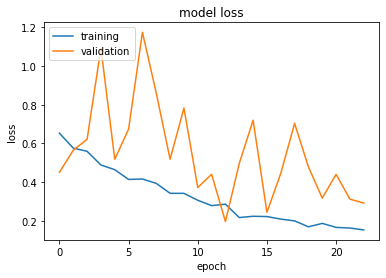

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [ ]:
# performing predictions
predictionsRNN = model2.predict(X_test) 

# unscaling the predictions
predictionsRNN = scaler_y.inverse_transform(np.array(predictionsRNN).reshape((len(predictionsRNN), 1)))

# printing the predictions
print('Predictions:')
predictionsRNN

Predictions:


array([[648.4793 ],
       [626.49384],
       [628.51733],
       [629.033  ],
       [621.3051 ],
       [597.31647],
       [607.81934],
       [601.03174],
       [598.22504],
       [598.3492 ],
       [607.6547 ],
       [638.0302 ],
       [645.1144 ],
       [639.0869 ],
       [638.89636],
       [629.71246],
       [613.66766],
       [599.86975],
       [596.9752 ],
       [587.85065],
       [591.6804 ],
       [587.37726],
       [585.0981 ],
       [581.77924],
       [596.6871 ],
       [594.3963 ],
       [609.76776],
       [614.4683 ],
       [622.5136 ],
       [629.4341 ],
       [631.2154 ],
       [617.6536 ],
       [601.27997],
       [586.8166 ],
       [590.3787 ],
       [588.31287],
       [583.7016 ],
       [581.0707 ],
       [583.0708 ],
       [581.9351 ],
       [586.13025],
       [579.1421 ],
       [583.0801 ],
       [585.58716],
       [588.1964 ],
       [588.5135 ],
       [590.9984 ],
       [599.1484 ],
       [610.3192 ],
       [621.86536],


### bi-RNN

In [ ]:
# setting the model architecture

seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

model3=Sequential()
model3.add(Bidirectional(SimpleRNN(250,return_sequences=True,activation='tanh',kernel_initializer=initializer),input_shape=(len(cols),1)))
model3.add(Dropout(0.4))
model3.add(Bidirectional(SimpleRNN(200,return_sequences=True,activation='tanh')))
model3.add(Dropout(0.4))
model3.add(Bidirectional(SimpleRNN(150,return_sequences=True,activation='tanh')))
model3.add(Dropout(0.4))
model3.add(Flatten())
model3.add(Dense(1, activation='linear'))

model3.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_17 (Bidirecti  (None, 25, 500)          126000    
 onal)                                                           
                                                                 
 dropout_43 (Dropout)        (None, 25, 500)           0         
                                                                 
 bidirectional_18 (Bidirecti  (None, 25, 400)          280400    
 onal)                                                           
                                                                 
 dropout_44 (Dropout)        (None, 25, 400)           0         
                                                                 
 bidirectional_19 (Bidirecti  (None, 25, 300)          165300    
 onal)                                                           
                                                     

In [ ]:
import tensorflow as tf
model3.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4)
)

callbacks = [tf.keras.callbacks.EarlyStopping(patience=10, \
    restore_best_weights=True)]

history = model3.fit(
    X_train,
    y_train,
    validation_split=0.1,
    epochs=250,
    batch_size=16,
    callbacks=callbacks,
    shuffle = False
)

Epoch 1/250
61/61 [==============================] - 11s 136ms/step - loss: 0.9706 - val_loss: 0.3575
Epoch 2/250
61/61 [==============================] - 7s 120ms/step - loss: 0.8264 - val_loss: 0.5388
Epoch 3/250
61/61 [==============================] - 7s 122ms/step - loss: 1.0028 - val_loss: 1.9901
Epoch 4/250
61/61 [==============================] - 8s 123ms/step - loss: 0.7960 - val_loss: 0.5195
Epoch 5/250
61/61 [==============================] - 7s 121ms/step - loss: 0.7516 - val_loss: 0.4061
Epoch 6/250
61/61 [==============================] - 7s 117ms/step - loss: 0.7175 - val_loss: 0.3026
Epoch 7/250
61/61 [==============================] - 7s 120ms/step - loss: 0.7021 - val_loss: 0.1400
Epoch 8/250
61/61 [==============================] - 7s 118ms/step - loss: 0.6736 - val_loss: 0.3458
Epoch 9/250
61/61 [==============================] - 7s 121ms/step - loss: 0.6296 - val_loss: 0.8269
Epoch 10/250
61/61 [==============================] - 7s 120ms/step - loss: 0.6128 - val_l

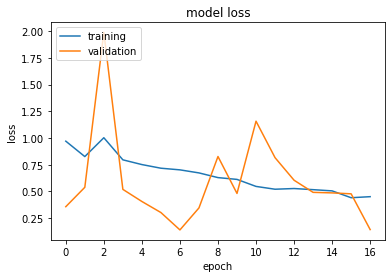

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [ ]:
# performing predictions
predictionsbiRNN = model3.predict(X_test) 

# unscaling the predictions
predictionsbiRNN = scaler_y.inverse_transform(np.array(predictionsbiRNN).reshape((len(predictionsbiRNN), 1)))

# printing the predictions
print('Predictions:')
predictionsbiRNN

Predictions:


array([[761.61664],
       [756.58997],
       [764.0845 ],
       [773.9614 ],
       [776.76135],
       [735.36444],
       [769.5206 ],
       [773.9305 ],
       [774.6555 ],
       [741.36444],
       [733.21643],
       [726.97626],
       [689.485  ],
       [708.45   ],
       [713.4277 ],
       [708.37537],
       [693.8836 ],
       [681.2758 ],
       [697.0149 ],
       [726.59   ],
       [712.98535],
       [727.26196],
       [727.57227],
       [728.66156],
       [731.41815],
       [737.5936 ],
       [732.9519 ],
       [736.29584],
       [715.7159 ],
       [708.64624],
       [704.74054],
       [735.3071 ],
       [744.7222 ],
       [747.50116],
       [750.5803 ],
       [751.211  ],
       [750.82275],
       [753.3268 ],
       [753.6938 ],
       [754.2867 ],
       [717.86835],
       [707.9514 ],
       [686.6575 ],
       [667.8239 ],
       [657.64777],
       [653.8394 ],
       [645.2216 ],
       [633.3719 ],
       [622.487  ],
       [648.2247 ],


### GRU

In [ ]:
# setting the seed to achieve consistent and less random predictions at each execution
seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
# setting the model architecture
model4=Sequential()
model4.add(GRU(250,return_sequences=True,activation='tanh',input_shape=(len(cols),1),kernel_initializer=initializer))
model4.add(Dropout(0.4))
model4.add(GRU(200,return_sequences=True,activation='tanh'))
model4.add(Dropout(0.4))
model4.add(GRU(150,activation='tanh'))
model4.add(Dropout(0.4))
model4.add(Flatten())
model4.add(Dense(1, activation = 'linear'))

# printing the model summary
model4.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_9 (GRU)                 (None, 25, 250)           189750    
                                                                 
 dropout_46 (Dropout)        (None, 25, 250)           0         
                                                                 
 gru_10 (GRU)                (None, 25, 200)           271200    
                                                                 
 dropout_47 (Dropout)        (None, 25, 200)           0         
                                                                 
 gru_11 (GRU)                (None, 150)               158400    
                                                                 
 dropout_48 (Dropout)        (None, 150)               0         
                                                                 
 flatten_15 (Flatten)        (None, 150)             

In [ ]:
import tensorflow as tf
model4.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4)
)

callbacks = [tf.keras.callbacks.EarlyStopping(patience=10, \
    restore_best_weights=True)]

history = model4.fit(
    X_train,
    y_train,
    validation_split=0.1,
    epochs=250,
    batch_size=16,
    callbacks=callbacks,
    shuffle = False
)

Epoch 1/250
61/61 [==============================] - 6s 42ms/step - loss: 0.1951 - val_loss: 5.1800
Epoch 2/250
61/61 [==============================] - 1s 10ms/step - loss: 0.0874 - val_loss: 2.8888
Epoch 3/250
61/61 [==============================] - 1s 10ms/step - loss: 0.0514 - val_loss: 1.3968
Epoch 4/250
61/61 [==============================] - 1s 10ms/step - loss: 0.0358 - val_loss: 0.6332
Epoch 5/250
61/61 [==============================] - 1s 10ms/step - loss: 0.0245 - val_loss: 0.3007
Epoch 6/250
61/61 [==============================] - 1s 10ms/step - loss: 0.0184 - val_loss: 0.1745
Epoch 7/250
61/61 [==============================] - 1s 11ms/step - loss: 0.0130 - val_loss: 0.1097
Epoch 8/250
61/61 [==============================] - 1s 10ms/step - loss: 0.0106 - val_loss: 0.0741
Epoch 9/250
61/61 [==============================] - 1s 10ms/step - loss: 0.0092 - val_loss: 0.0327
Epoch 10/250
61/61 [==============================] - 1s 10ms/step - loss: 0.0086 - val_loss: 0.0304

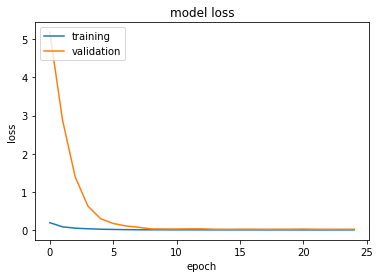

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [ ]:
# performing predictions
predictionsGRU = model4.predict(X_test) 

# unscaling the predictions
predictionsGRU = scaler_y.inverse_transform(np.array(predictionsGRU).reshape((len(predictionsGRU), 1)))

# printing the predictions
print('Predictions:')
predictionsGRU

Predictions:


array([[ 732.3163 ],
       [ 714.751  ],
       [ 724.0372 ],
       [ 715.5427 ],
       [ 737.2358 ],
       [ 726.2811 ],
       [ 742.1067 ],
       [ 712.9068 ],
       [ 694.2473 ],
       [ 681.6825 ],
       [ 687.3732 ],
       [ 690.06793],
       [ 668.8197 ],
       [ 668.84875],
       [ 661.2884 ],
       [ 664.2773 ],
       [ 642.27515],
       [ 609.7497 ],
       [ 596.40564],
       [ 583.3977 ],
       [ 575.22943],
       [ 568.02515],
       [ 572.888  ],
       [ 552.5275 ],
       [ 572.00323],
       [ 580.15375],
       [ 585.8915 ],
       [ 597.4145 ],
       [ 604.39606],
       [ 613.9827 ],
       [ 617.43304],
       [ 614.149  ],
       [ 602.25037],
       [ 582.3561 ],
       [ 577.51074],
       [ 585.0331 ],
       [ 603.0649 ],
       [ 590.992  ],
       [ 599.3955 ],
       [ 594.6726 ],
       [ 608.4191 ],
       [ 598.11426],
       [ 593.6957 ],
       [ 603.86035],
       [ 613.73553],
       [ 616.0781 ],
       [ 614.0136 ],
       [ 641.

### bi-GRU

In [ ]:
# setting the seed to achieve consistent and less random predictions at each execution
seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# setting the model architecture
model5=Sequential()
model5.add(Bidirectional(GRU(250,return_sequences=True,activation='tanh',kernel_initializer=initializer),input_shape=(len(cols),1)))
model5.add(Dropout(0.4))
model5.add(Bidirectional(GRU(200,activation='tanh',return_sequences=True)))
model5.add(Dropout(0.4))
model5.add(Bidirectional(GRU(150,activation='tanh')))
model5.add(Dropout(0.4))
model5.add(Dense(1, activation = 'linear'))

model5.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_20 (Bidirecti  (None, 25, 500)          379500    
 onal)                                                           
                                                                 
 dropout_49 (Dropout)        (None, 25, 500)           0         
                                                                 
 bidirectional_21 (Bidirecti  (None, 25, 400)          842400    
 onal)                                                           
                                                                 
 dropout_50 (Dropout)        (None, 25, 400)           0         
                                                                 
 bidirectional_22 (Bidirecti  (None, 300)              496800    
 onal)                                                           
                                                     

In [ ]:
import tensorflow as tf
model5.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4)
)

callbacks = [tf.keras.callbacks.EarlyStopping(patience=10, \
    restore_best_weights=True)]

history = model5.fit(
    X_train,
    y_train,
    validation_split=0.1,
    epochs=250,
    batch_size=16,
    callbacks=callbacks,
    shuffle = False
)

Epoch 1/250
61/61 [==============================] - 10s 47ms/step - loss: 0.0339 - val_loss: 0.0370
Epoch 2/250
61/61 [==============================] - 1s 18ms/step - loss: 0.0217 - val_loss: 0.1055
Epoch 3/250
61/61 [==============================] - 1s 18ms/step - loss: 0.0118 - val_loss: 0.0276
Epoch 4/250
61/61 [==============================] - 1s 18ms/step - loss: 0.0140 - val_loss: 0.0777
Epoch 5/250
61/61 [==============================] - 1s 19ms/step - loss: 0.0110 - val_loss: 0.0270
Epoch 6/250
61/61 [==============================] - 1s 19ms/step - loss: 0.0122 - val_loss: 0.1112
Epoch 7/250
61/61 [==============================] - 1s 19ms/step - loss: 0.0199 - val_loss: 0.0775
Epoch 8/250
61/61 [==============================] - 1s 19ms/step - loss: 0.0153 - val_loss: 0.0670
Epoch 9/250
61/61 [==============================] - 1s 19ms/step - loss: 0.0198 - val_loss: 0.0857
Epoch 10/250
61/61 [==============================] - 1s 19ms/step - loss: 0.0154 - val_loss: 0.088

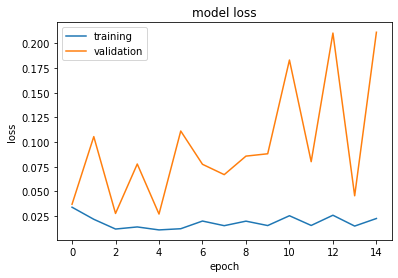

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [ ]:
# performing predictions
predictionsbiGRU = model5.predict(X_test) 

# unscaling the predictions
predictionsbiGRU = scaler_y.inverse_transform(np.array(predictionsbiGRU).reshape((len(predictionsbiGRU), 1)))

# printing the predictions
print('Predictions:')
predictionsbiGRU

Predictions:


array([[ 745.63794],
       [ 733.3983 ],
       [ 741.482  ],
       [ 744.99347],
       [ 745.6884 ],
       [ 740.11365],
       [ 751.82086],
       [ 735.05975],
       [ 723.7806 ],
       [ 718.13794],
       [ 724.59076],
       [ 704.6483 ],
       [ 692.2178 ],
       [ 698.9108 ],
       [ 694.3514 ],
       [ 694.20544],
       [ 673.9114 ],
       [ 656.67316],
       [ 636.1561 ],
       [ 621.9437 ],
       [ 620.0155 ],
       [ 610.7987 ],
       [ 609.18536],
       [ 598.2677 ],
       [ 606.40295],
       [ 608.3413 ],
       [ 616.8013 ],
       [ 620.97174],
       [ 629.6374 ],
       [ 636.991  ],
       [ 637.468  ],
       [ 636.29083],
       [ 626.64557],
       [ 611.8443 ],
       [ 615.36774],
       [ 619.7518 ],
       [ 625.49994],
       [ 621.0723 ],
       [ 626.627  ],
       [ 626.4754 ],
       [ 628.4204 ],
       [ 624.1954 ],
       [ 622.45734],
       [ 629.9682 ],
       [ 638.52405],
       [ 638.2651 ],
       [ 641.01514],
       [ 661.

### LSTM

In [ ]:
# setting the seed to achieve consistent and less random predictions at each execution
seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# setting the model architecture
model6=Sequential()
model6.add(LSTM(250,return_sequences=True,activation='tanh',input_shape=(len(cols),1), kernel_initializer=initializer))
model6.add(Dropout(0.4))
model6.add(LSTM(200,return_sequences=True,activation='tanh'))
model6.add(Dropout(0.4))
model6.add(LSTM(150,return_sequences=True,activation='tanh'))
model6.add(Dropout(0.4))
model6.add(Flatten())
model6.add(Dense(1, activation = 'linear'))

# printing the model summary
model6.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 25, 250)           252000    
                                                                 
 dropout_52 (Dropout)        (None, 25, 250)           0         
                                                                 
 lstm_18 (LSTM)              (None, 25, 200)           360800    
                                                                 
 dropout_53 (Dropout)        (None, 25, 200)           0         
                                                                 
 lstm_19 (LSTM)              (None, 25, 150)           210600    
                                                                 
 dropout_54 (Dropout)        (None, 25, 150)           0         
                                                                 
 flatten_16 (Flatten)        (None, 3750)            

In [ ]:
import tensorflow as tf
model6.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4)
)

callbacks = [tf.keras.callbacks.EarlyStopping(patience=10, \
    restore_best_weights=True)]

history = model6.fit(
    X_train,
    y_train,
    validation_split=0.1,
    epochs=250,
    batch_size=16,
    callbacks=callbacks,
    shuffle = False
)

Epoch 1/250
61/61 [==============================] - 7s 29ms/step - loss: 0.1676 - val_loss: 4.0512
Epoch 2/250
61/61 [==============================] - 1s 12ms/step - loss: 0.0299 - val_loss: 0.0498
Epoch 3/250
61/61 [==============================] - 1s 12ms/step - loss: 0.0317 - val_loss: 0.4994
Epoch 4/250
61/61 [==============================] - 1s 12ms/step - loss: 0.0592 - val_loss: 0.8365
Epoch 5/250
61/61 [==============================] - 1s 12ms/step - loss: 0.0146 - val_loss: 0.0639
Epoch 6/250
61/61 [==============================] - 1s 12ms/step - loss: 0.0090 - val_loss: 0.1117
Epoch 7/250
61/61 [==============================] - 1s 12ms/step - loss: 0.0081 - val_loss: 0.1014
Epoch 8/250
61/61 [==============================] - 1s 11ms/step - loss: 0.0160 - val_loss: 0.2330
Epoch 9/250
61/61 [==============================] - 1s 11ms/step - loss: 0.0151 - val_loss: 0.2760
Epoch 10/250
61/61 [==============================] - 1s 12ms/step - loss: 0.0367 - val_loss: 0.8859

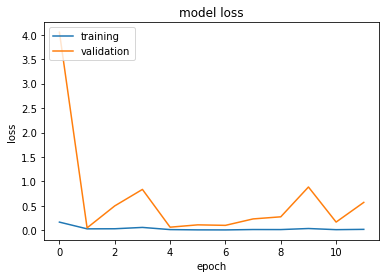

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [ ]:
# performing predictions
predictionsLSTM = model6.predict(X_test) 

# unscaling the predictions
predictionsLSTM = scaler_y.inverse_transform(np.array(predictionsLSTM).reshape((len(predictionsLSTM), 1)))

# printing the predictions
print('Predictions:')
predictionsLSTM

Predictions:


array([[746.8324 ],
       [728.07416],
       [743.38574],
       [746.99   ],
       [744.27405],
       [721.2147 ],
       [735.9822 ],
       [728.353  ],
       [721.7378 ],
       [730.43866],
       [737.35736],
       [717.0553 ],
       [706.39404],
       [720.87177],
       [721.7716 ],
       [720.9083 ],
       [710.2766 ],
       [701.5906 ],
       [685.9703 ],
       [670.6364 ],
       [671.4258 ],
       [661.16815],
       [655.9775 ],
       [649.99493],
       [652.7562 ],
       [652.2667 ],
       [659.6718 ],
       [661.2823 ],
       [673.9022 ],
       [680.6643 ],
       [681.9843 ],
       [672.40686],
       [659.0183 ],
       [648.9418 ],
       [650.045  ],
       [649.75714],
       [650.3874 ],
       [648.3857 ],
       [649.5539 ],
       [648.97687],
       [628.87006],
       [628.65497],
       [614.793  ],
       [612.5427 ],
       [625.2272 ],
       [612.6584 ],
       [612.27356],
       [624.7322 ],
       [661.67773],
       [671.3778 ],


### bi-LSTM

In [ ]:
# setting the seed to achieve consistent and less random predictions at each execution
seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# Building the model

model7=Sequential()
model7.add(Bidirectional(LSTM(250,return_sequences=True,activation='tanh', kernel_initializer=initializer),input_shape=(len(cols),1)))
model7.add(Dropout(0.4))
model7.add(Bidirectional(LSTM(200,return_sequences=True,activation='tanh')))
model7.add(Dropout(0.4))
model7.add(Bidirectional(LSTM(150,return_sequences=True,activation='tanh')))
model7.add(Dropout(0.4))
model7.add(Flatten())
model7.add(Dense(1, activation = 'linear'))

model7.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_23 (Bidirecti  (None, 25, 500)          504000    
 onal)                                                           
                                                                 
 dropout_55 (Dropout)        (None, 25, 500)           0         
                                                                 
 bidirectional_24 (Bidirecti  (None, 25, 400)          1121600   
 onal)                                                           
                                                                 
 dropout_56 (Dropout)        (None, 25, 400)           0         
                                                                 
 bidirectional_25 (Bidirecti  (None, 25, 300)          661200    
 onal)                                                           
                                                     

In [ ]:
import tensorflow as tf
model7.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4)
)

callbacks = [tf.keras.callbacks.EarlyStopping(patience=10, \
    restore_best_weights=True)]

history = model7.fit(
    X_train,
    y_train,
    validation_split=0.1,
    epochs=250,
    batch_size=16,
    callbacks=callbacks,
    shuffle = False
)

Epoch 1/250
61/61 [==============================] - 12s 69ms/step - loss: 0.0686 - val_loss: 0.3594
Epoch 2/250
61/61 [==============================] - 1s 21ms/step - loss: 0.0323 - val_loss: 0.3584
Epoch 3/250
61/61 [==============================] - 1s 20ms/step - loss: 0.0250 - val_loss: 0.0772
Epoch 4/250
61/61 [==============================] - 1s 20ms/step - loss: 0.0261 - val_loss: 0.3347
Epoch 5/250
61/61 [==============================] - 1s 20ms/step - loss: 0.0280 - val_loss: 0.2181
Epoch 6/250
61/61 [==============================] - 1s 20ms/step - loss: 0.0217 - val_loss: 0.2342
Epoch 7/250
61/61 [==============================] - 1s 20ms/step - loss: 0.0304 - val_loss: 0.3314
Epoch 8/250
61/61 [==============================] - 1s 20ms/step - loss: 0.0197 - val_loss: 0.2260
Epoch 9/250
61/61 [==============================] - 1s 20ms/step - loss: 0.0267 - val_loss: 0.2633
Epoch 10/250
61/61 [==============================] - 1s 20ms/step - loss: 0.0180 - val_loss: 0.181

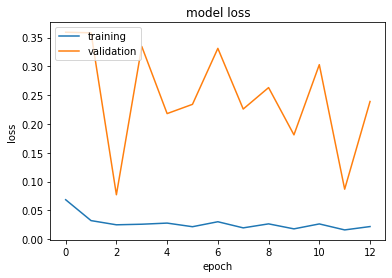

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [ ]:
# performing predictions
predictionsbiLSTM = model7.predict(X_test) 

# unscaling the predictions
predictionsbiLSTM = scaler_y.inverse_transform(np.array(predictionsbiLSTM).reshape((len(predictionsbiLSTM), 1)))

# printing the predictions
print('Predictions:')
predictionsbiLSTM

Predictions:


array([[677.9009 ],
       [679.07513],
       [675.0997 ],
       [673.3214 ],
       [675.8927 ],
       [678.1124 ],
       [681.66785],
       [668.7485 ],
       [657.07837],
       [648.0817 ],
       [652.2243 ],
       [661.43195],
       [659.55383],
       [644.5818 ],
       [638.4636 ],
       [627.7617 ],
       [614.0426 ],
       [602.0551 ],
       [586.4285 ],
       [586.7916 ],
       [576.9773 ],
       [572.3131 ],
       [571.60956],
       [566.8803 ],
       [570.56006],
       [570.9839 ],
       [581.3474 ],
       [583.8533 ],
       [587.92645],
       [590.6819 ],
       [589.24915],
       [586.2838 ],
       [580.843  ],
       [574.5262 ],
       [574.03516],
       [576.3081 ],
       [580.6092 ],
       [573.3628 ],
       [580.37634],
       [578.0959 ],
       [583.98987],
       [579.55304],
       [580.10077],
       [583.91034],
       [591.11566],
       [589.19055],
       [589.7075 ],
       [608.0894 ],
       [637.684  ],
       [637.26654],


### Cnn BI-LSTM

In [ ]:
# setting the seed to achieve consistent and less random predictions at each execution
seed = 42
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# Building the model

model8=Sequential()
model8.add(Conv1D(filters=250, kernel_size=2, activation='relu', input_shape=(len(cols),1),kernel_initializer=initializer))
model8.add(MaxPooling1D(pool_size=2))
model8.add(Dropout(0.4))
model8.add(Bidirectional(LSTM(250,return_sequences=True,activation='tanh')))
model8.add(Dropout(0.4))
model8.add(Bidirectional(LSTM(200,return_sequences=True,activation='tanh')))
model8.add(Dropout(0.4))
model8.add(Bidirectional(LSTM(150,return_sequences=True,activation='tanh')))
model8.add(Dropout(0.4))
model8.add(Flatten())
model8.add(Dense(1, activation = 'linear'))

model8.summary()


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 24, 250)           750       
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 12, 250)          0         
 1D)                                                             
                                                                 
 dropout_58 (Dropout)        (None, 12, 250)           0         
                                                                 
 bidirectional_26 (Bidirecti  (None, 12, 500)          1002000   
 onal)                                                           
                                                                 
 dropout_59 (Dropout)        (None, 12, 500)           0         
                                                                 
 bidirectional_27 (Bidirecti  (None, 12, 400)        

In [ ]:
import tensorflow as tf
model8.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4)
)

callbacks = [tf.keras.callbacks.EarlyStopping(patience=10, \
    restore_best_weights=True)]

history = model8.fit(
    X_train,
    y_train,
    validation_split=0.1,
    epochs=250,
    batch_size=16,
    callbacks=callbacks,
    shuffle = False
)

Epoch 1/250
61/61 [==============================] - 12s 50ms/step - loss: 0.1714 - val_loss: 6.0168
Epoch 2/250
61/61 [==============================] - 1s 18ms/step - loss: 0.2293 - val_loss: 6.4881
Epoch 3/250
61/61 [==============================] - 1s 18ms/step - loss: 0.1399 - val_loss: 3.5943
Epoch 4/250
61/61 [==============================] - 1s 18ms/step - loss: 0.0318 - val_loss: 0.2366
Epoch 5/250
61/61 [==============================] - 1s 18ms/step - loss: 0.0211 - val_loss: 0.0650
Epoch 6/250
61/61 [==============================] - 1s 18ms/step - loss: 0.0226 - val_loss: 0.8535
Epoch 7/250
61/61 [==============================] - 1s 17ms/step - loss: 0.0283 - val_loss: 0.7134
Epoch 8/250
61/61 [==============================] - 1s 18ms/step - loss: 0.0727 - val_loss: 2.0695
Epoch 9/250
61/61 [==============================] - 1s 17ms/step - loss: 0.0201 - val_loss: 0.0752
Epoch 10/250
61/61 [==============================] - 1s 18ms/step - loss: 0.0373 - val_loss: 0.429

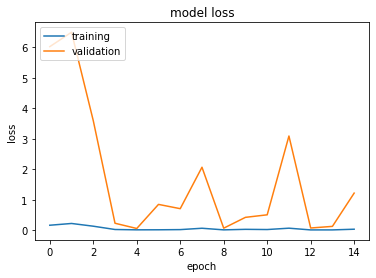

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [ ]:
# performing predictions
predictionsCNNbiLSTM = model8.predict(X_test) 

# unscaling the predictions
predictionsCNNbiLSTM = scaler_y.inverse_transform(np.array(predictionsCNNbiLSTM).reshape((len(predictionsCNNbiLSTM), 1)))

# printing the predictions
print('Predictions:')
predictionsCNNbiLSTM

Predictions:


array([[ 688.15015],
       [ 692.5478 ],
       [ 686.36725],
       [ 679.2985 ],
       [ 688.00366],
       [ 649.6421 ],
       [ 681.0122 ],
       [ 663.3583 ],
       [ 643.2966 ],
       [ 635.41614],
       [ 653.4437 ],
       [ 652.9548 ],
       [ 660.7778 ],
       [ 632.4067 ],
       [ 623.7137 ],
       [ 604.3097 ],
       [ 604.73987],
       [ 596.0482 ],
       [ 583.5572 ],
       [ 585.7877 ],
       [ 567.1103 ],
       [ 560.0688 ],
       [ 562.9842 ],
       [ 559.4325 ],
       [ 565.45593],
       [ 550.834  ],
       [ 581.4176 ],
       [ 577.9167 ],
       [ 583.2592 ],
       [ 584.40063],
       [ 577.85455],
       [ 551.857  ],
       [ 558.04834],
       [ 555.6258 ],
       [ 547.56323],
       [ 549.6224 ],
       [ 557.9801 ],
       [ 540.128  ],
       [ 554.666  ],
       [ 543.5342 ],
       [ 539.961  ],
       [ 537.2572 ],
       [ 527.4695 ],
       [ 523.333  ],
       [ 533.02014],
       [ 529.9576 ],
       [ 524.4373 ],
       [ 550.

### Auto Encoder

In [ ]:
from keras.utils.vis_utils import plot_model
from tensorflow.keras.layers import RepeatVector

seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

model9 = Sequential()


model9.add(Bidirectional(LSTM(250,activation='tanh',return_sequences=True, kernel_initializer=initializer), input_shape = (len(cols),1)))
model9.add(Dropout(0.4))
model9.add(LSTM(200, activation = 'tanh'))
model9.add(Flatten())


model9.add(RepeatVector(n=len(cols)))


model9.add(LSTM(200, activation = 'tanh',return_sequences=True))
model9.add(Dropout(0.4))
model9.add((LSTM(250,return_sequences=True,activation='tanh')))
model9.add(Dropout(0.3))

model9.add(Flatten())
model9.add(Dropout(0.4))
model9.add(Dense(1,activation = "linear"))
model9.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_29 (Bidirecti  (None, 25, 500)          504000    
 onal)                                                           
                                                                 
 dropout_62 (Dropout)        (None, 25, 500)           0         
                                                                 
 lstm_27 (LSTM)              (None, 200)               560800    
                                                                 
 flatten_19 (Flatten)        (None, 200)               0         
                                                                 
 repeat_vector_2 (RepeatVect  (None, 25, 200)          0         
 or)                                                             
                                                                 
 lstm_28 (LSTM)              (None, 25, 200)         

In [ ]:
model9.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4)
)

callbacks = [tf.keras.callbacks.EarlyStopping(patience=10, \
    restore_best_weights=True)]

history = model9.fit(
    X_train,
    y_train,
    validation_split=0.1,
    epochs=250,
    batch_size=16,
    callbacks=callbacks,
    shuffle = False
)

Epoch 1/250
61/61 [==============================] - 9s 44ms/step - loss: 0.1344 - val_loss: 3.1671
Epoch 2/250
61/61 [==============================] - 1s 18ms/step - loss: 0.0334 - val_loss: 0.1467
Epoch 3/250
61/61 [==============================] - 1s 18ms/step - loss: 0.0188 - val_loss: 0.0907
Epoch 4/250
61/61 [==============================] - 1s 18ms/step - loss: 0.0187 - val_loss: 0.2166
Epoch 5/250
61/61 [==============================] - 1s 18ms/step - loss: 0.0110 - val_loss: 0.3220
Epoch 6/250
61/61 [==============================] - 1s 18ms/step - loss: 0.0116 - val_loss: 0.0620
Epoch 7/250
61/61 [==============================] - 1s 18ms/step - loss: 0.0091 - val_loss: 0.0682
Epoch 8/250
61/61 [==============================] - 1s 18ms/step - loss: 0.0092 - val_loss: 0.0318
Epoch 9/250
61/61 [==============================] - 1s 17ms/step - loss: 0.0090 - val_loss: 0.0717
Epoch 10/250
61/61 [==============================] - 1s 18ms/step - loss: 0.0088 - val_loss: 0.0430

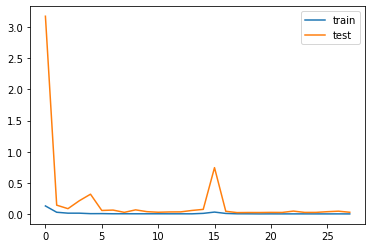

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [ ]:
# performing predictions
predictionsAUTOENC = model9.predict(X_test) 
print(predictionsAUTOENC.shape)
# unscaling the predictions
predictionsAUTOENC  = scaler_y.inverse_transform(np.array(predictionsAUTOENC).reshape((len(predictionsAUTOENC), 1)))

# printing the predictions
print('Predictions:',predictionsAUTOENC)

(267, 1)
Predictions: [[ 724.73236]
 [ 707.834  ]
 [ 714.9241 ]
 [ 709.07513]
 [ 719.6946 ]
 [ 698.58997]
 [ 717.36926]
 [ 698.85803]
 [ 684.3713 ]
 [ 677.88385]
 [ 684.831  ]
 [ 704.81464]
 [ 694.6302 ]
 [ 678.98315]
 [ 670.6155 ]
 [ 662.4824 ]
 [ 643.9462 ]
 [ 621.1335 ]
 [ 605.41156]
 [ 599.7326 ]
 [ 588.93365]
 [ 581.8243 ]
 [ 583.5554 ]
 [ 571.68353]
 [ 584.6369 ]
 [ 586.4804 ]
 [ 598.79803]
 [ 606.1279 ]
 [ 612.9565 ]
 [ 619.298  ]
 [ 619.4248 ]
 [ 610.9908 ]
 [ 600.09906]
 [ 585.87024]
 [ 581.8697 ]
 [ 585.776  ]
 [ 596.6298 ]
 [ 585.3771 ]
 [ 593.94586]
 [ 589.50854]
 [ 594.3756 ]
 [ 586.2836 ]
 [ 579.08057]
 [ 581.3362 ]
 [ 594.5085 ]
 [ 587.20905]
 [ 582.92957]
 [ 603.7429 ]
 [ 658.611  ]
 [ 662.2017 ]
 [ 661.93256]
 [ 663.24286]
 [ 667.27423]
 [ 666.90796]
 [ 674.61536]
 [ 661.1663 ]
 [ 647.94965]
 [ 640.5494 ]
 [ 650.8161 ]
 [ 669.95795]
 [ 669.38617]
 [ 659.65826]
 [ 647.0952 ]
 [ 644.0097 ]
 [ 636.0146 ]
 [ 640.35425]
 [ 637.4404 ]
 [ 629.25366]
 [ 622.5898 ]
 [ 642.07416

# Unscaling

In [ ]:
# unscaling the test feature dataset, x_test
# unscaling the test y dataset, y_test+
y_train = scaler_y.inverse_transform(np.array(y_train).reshape((len(y_train), 1)))
y_test = scaler_y.inverse_transform(np.array(y_test).reshape((len(y_test), 1)))

# Comparision

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
models = ['mlp','cnn', 'rnn', 'bi-rnn', 'gru', 'bi-gru', 'lstm', 'bi-lstm', 'cnn-bilstm', 'autoencoder']
preds = [predictionsMLP,predictionsCNN,predictionsRNN,predictionsbiRNN,predictionsGRU,predictionsbiGRU,predictionsLSTM,predictionsbiLSTM,predictionsCNNbiLSTM,predictionsAUTOENC]
mae = []
mse = []
rmse = []
r2s = []
mape = []

### MAE SCORE

In [ ]:
from sklearn.metrics import mean_absolute_error
for x in range(0,10):
  mae.append(mean_absolute_error(y_test,preds[x]))
  print('MAE of '+models[x]+' ',mae[x])

MAE of mlp  139.98611964536516
MAE of cnn  116.64264716101943
MAE of rnn  184.19415557518434
MAE of bi-rnn  165.26894878716058
MAE of gru  26.688389467389396
MAE of bi-gru  30.50922979576311
MAE of lstm  78.98257000526685
MAE of bi-lstm  87.04617069544418
MAE of cnn-bilstm  62.81154629710908
MAE of autoencoder  57.88536431816187


### MSE SCORE

In [ ]:
mse.append(np.square(np.subtract(y_test,predictionsMLP)).mean()) 
mse.append(np.square(np.subtract(y_test,predictionsCNN)).mean()) 
mse.append(np.square(np.subtract(y_test,predictionsRNN)).mean())
mse.append(np.square(np.subtract(y_test,predictionsbiRNN)).mean()) 
mse.append(np.square(np.subtract(y_test,predictionsGRU)).mean())
mse.append(np.square(np.subtract(y_test,predictionsbiGRU)).mean())
mse.append(np.square(np.subtract(y_test,predictionsLSTM)).mean()) 
mse.append(np.square(np.subtract(y_test,predictionsbiLSTM)).mean())   
mse.append(np.square(np.subtract(y_test,predictionsCNNbiLSTM)).mean()) 
mse.append(np.square(np.subtract(y_test,predictionsAUTOENC)).mean())   

for x in range(0, 10):
  print('MSE of '+models[x]+' ',mse[x])


MSE of mlp  30330.783134070647
MSE of cnn  21093.782585195306
MSE of rnn  54329.29604997153
MSE of bi-rnn  41332.72175110583
MSE of gru  1324.1391152245474
MSE of bi-gru  1777.970624020986
MSE of lstm  11085.579759222486
MSE of bi-lstm  11639.180524111338
MSE of cnn-bilstm  5724.318045223641
MSE of autoencoder  6271.041771956332


### RMSE SCORE

In [ ]:
for m in mse:
    i = round(np.sqrt(m),4)
    rmse.append(i)

for x in range(0, 10):
  print('RMSE of '+models[x]+' ',rmse[x])

RMSE of mlp  174.1574
RMSE of cnn  145.237
RMSE of rnn  233.0865
RMSE of bi-rnn  203.3045
RMSE of gru  36.3887
RMSE of bi-gru  42.166
RMSE of lstm  105.2881
RMSE of bi-lstm  107.885
RMSE of cnn-bilstm  75.6592
RMSE of autoencoder  79.1899


### R2 Score

In [ ]:
from sklearn.metrics import r2_score
n=40
k=2
for x in range(0,10):
  r2 = r2_score(y_test, preds[x])
  adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
  r2s.append(adj_r2_score)
  print('R2 of '+models[x]+' ',r2s[x])

R2 of mlp  -0.05483250953341434
R2 of cnn  0.2664084035832278
R2 of rnn  -0.8894437192820355
R2 of bi-rnn  -0.43745377156418774
R2 of gru  0.953949590430631
R2 of bi-gru  0.9381664097849806
R2 of lstm  0.6144698979460831
R2 of bi-lstm  0.5952169798289981
R2 of cnn-bilstm  0.8009218310546048
R2 of autoencoder  0.7819080799707069


### MAPE Score

In [ ]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape
    
for x in range(0,10):
  mape.append(MAPE(y_test,preds[x]))
  print('MAPE of '+models[x]+' ',mape[x])

MAPE of mlp  14.835288809003549
MAPE of cnn  12.42163461540724
MAPE of rnn  19.341127934498154
MAPE of bi-rnn  18.141302216471228
MAPE of gru  3.061386792190193
MAPE of bi-gru  3.478567860581535
MAPE of lstm  8.542416496683188
MAPE of bi-lstm  9.399749487085417
MAPE of cnn-bilstm  7.431315724178789
MAPE of autoencoder  6.155851934515935


# Conclusion

In [ ]:
df = pd.DataFrame(list(zip(models, mae, mse, rmse, r2s, mape)),
               columns =['Model', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'Adjusted R2', 'Mean Absolute Percentage Error'])

df

,Model,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Adjusted R2,Mean Absolute Percentage Error
0,mlp,139.986120,30330.783134,174.1574,-0.054833,14.835289
1,cnn,116.642647,21093.782585,145.2370,0.266408,12.421635
2,rnn,184.194156,54329.296050,233.0865,-0.889444,19.341128
3,bi-rnn,165.268949,41332.721751,203.3045,-0.437454,18.141302
4,gru,26.688389,1324.139115,36.3887,0.953950,3.061387
5,bi-gru,30.509230,1777.970624,42.1660,0.938166,3.478568
6,lstm,78.982570,11085.579759,105.2881,0.614470,8.542416
7,bi-lstm,87.046171,11639.180524,107.8850,0.595217,9.399749
8,cnn-bilstm,62.811546,5724.318045,75.6592,0.800922,7.431316
9,autoencoder,57.885364,6271.041772,79.1899,0.781908,6.155852


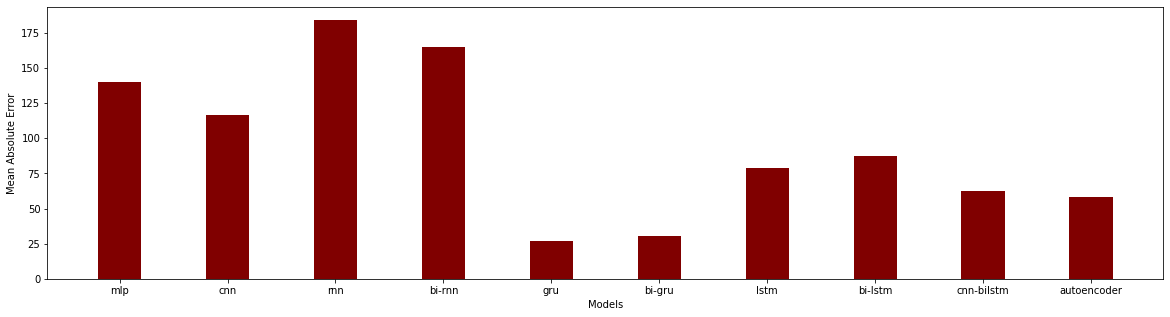

In [ ]:
fig = plt.figure(figsize = (20, 5))
 
# creating the bar plot
plt.bar(df['Model'], df['Mean Absolute Error'], color ='maroon',
        width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("Mean Absolute Error")
plt.show()

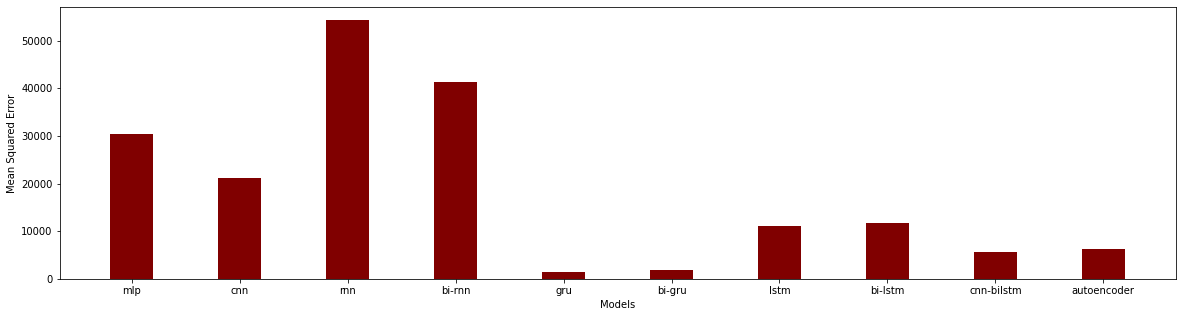

In [ ]:
fig = plt.figure(figsize = (20, 5))
 
# creating the bar plot
plt.bar(df['Model'], df['Mean Squared Error'], color ='maroon',
        width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("Mean Squared Error")
plt.show()

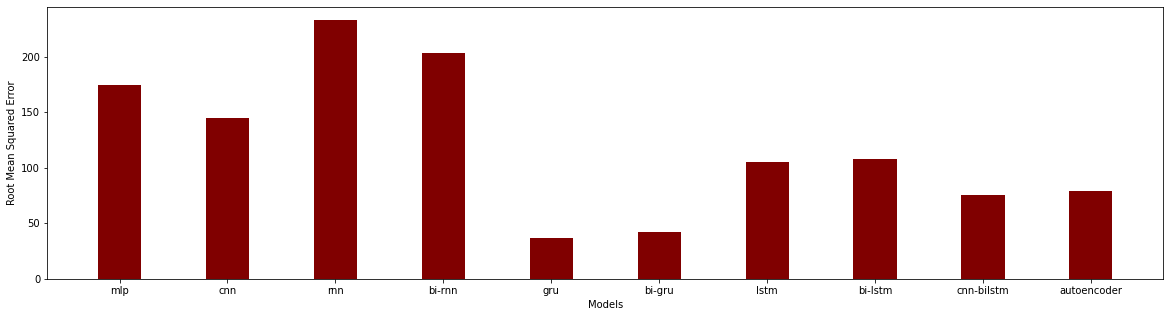

In [ ]:
fig = plt.figure(figsize = (20, 5))
 
# creating the bar plot
plt.bar(df['Model'], df['Root Mean Squared Error'], color ='maroon',
        width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("Root Mean Squared Error")
plt.show()

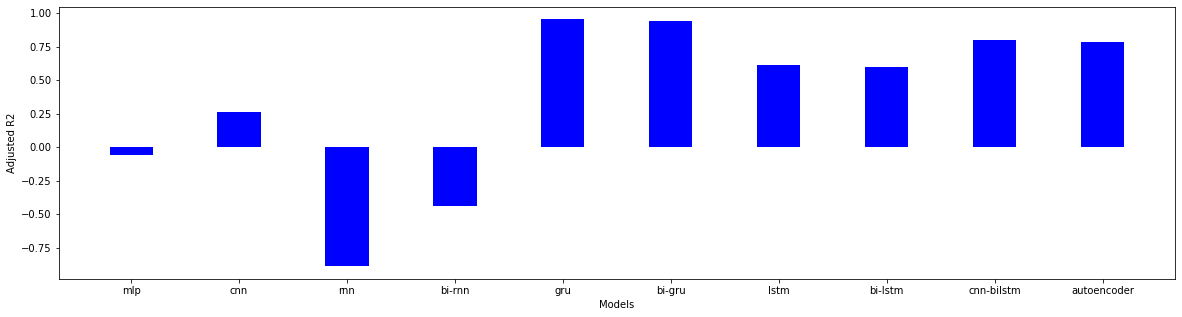

In [ ]:
fig = plt.figure(figsize = (20, 5))
 
# creating the bar plot
plt.bar(df['Model'], df['Adjusted R2'], color ='blue',
        width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("Adjusted R2")
plt.show()

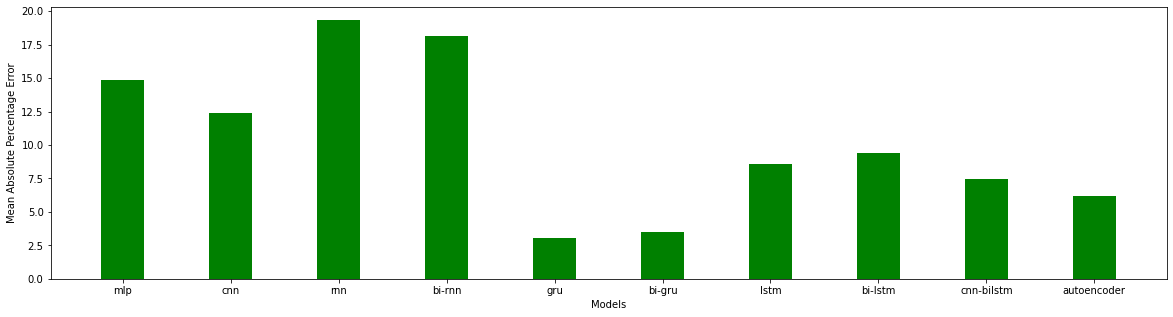

In [ ]:
fig = plt.figure(figsize = (20, 5))
 
# creating the bar plot
plt.bar(df['Model'], df['Mean Absolute Percentage Error'], color ='green',
        width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("Mean Absolute Percentage Error")
plt.show()

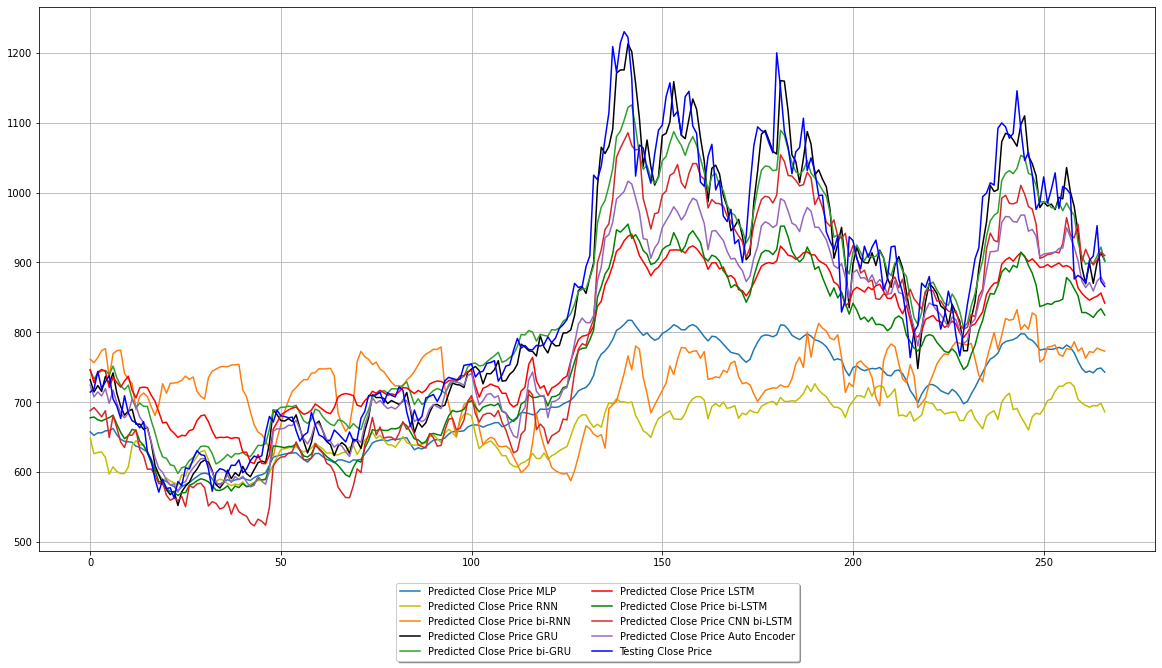

In [ ]:
# plotting
plt.figure(figsize=(20,10))

# plt.plot([row[0] for row in y_train], label="Training Close Price")
plt.plot(predictionsMLP,'-', label="Predicted Close Price MLP")
plt.plot(predictionsRNN,'-y', label="Predicted Close Price RNN")
plt.plot(predictionsbiRNN,'-', label="Predicted Close Price bi-RNN")
plt.plot(predictionsGRU,'-k', label="Predicted Close Price GRU")
plt.plot(predictionsbiGRU,'-', label="Predicted Close Price bi-GRU")
plt.plot(predictionsLSTM,'-r', label="Predicted Close Price LSTM")
plt.plot(predictionsbiLSTM,'-g', label="Predicted Close Price bi-LSTM")
plt.plot(predictionsCNNbiLSTM,'-', label="Predicted Close Price CNN bi-LSTM")
plt.plot(predictionsAUTOENC,'-', label="Predicted Close Price Auto Encoder")
plt.plot([row[0] for row in y_test],color = 'b', label="Testing Close Price")

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)
plt.grid()
plt.show()


 BEST MODEL IS: GRU MODEL

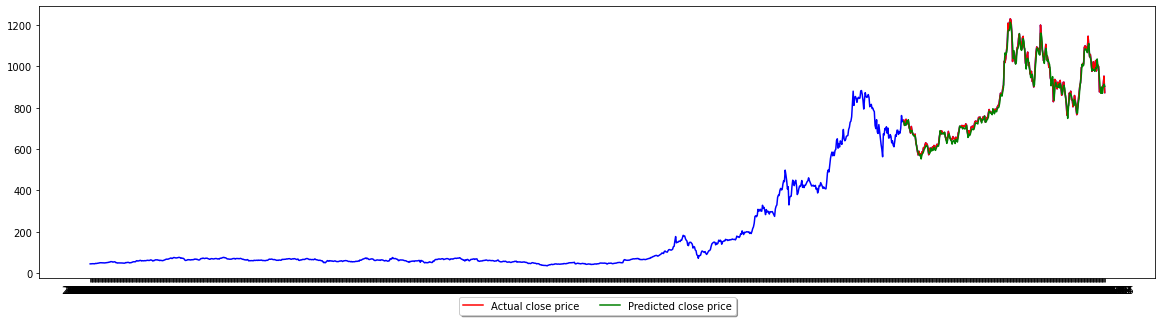

In [ ]:
val = data[len(y_train)+1:]
val['pred'] = predictionsGRU
plt.figure(figsize = (20,5))
plt.plot(data['close_price'], color = 'b')
plt.plot(val['close_price'], label = 'Actual close price', color = 'r')
plt.plot(val['pred'], label = 'Predicted close price', color = 'g')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)
plt.show()